# 1

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from AAL.csv
df = pd.read_csv('AAL.csv')

# Shift 'Adj Close' to get yesterday's Close for each row
df['Prev_Close'] = df['Adj Close'].shift(1)

# Remove the first row since it won't have a previous close
df = df.dropna()

# Define a function to calculate daily profit/loss for each strategy
def calculate_strategy_profit(df):
    inertia_profit = []
    reversal_profit = []

    for index, row in df.iterrows():
        open_price = row['Open']
        adj_close = row['Adj Close']
        prev_close = row['Prev_Close']
        
        # Inertia Strategy
        if open_price > prev_close:
            shares_bought = 100 / open_price
            profit_inertia = shares_bought * (adj_close - open_price)
        else:
            shares_sold = 100 / open_price
            profit_inertia = shares_sold * (open_price - adj_close)
        
        inertia_profit.append(round(profit_inertia, 2))

        # Reversal Strategy
        if open_price > prev_close:
            shares_sold = 100 / open_price
            profit_reversal = shares_sold * (open_price - adj_close)
        else:
            shares_bought = 100 / open_price
            profit_reversal = shares_bought * (adj_close - open_price)
        
        reversal_profit.append(round(profit_reversal, 2))
    
    df['Inertia_Profit'] = inertia_profit
    df['Reversal_Profit'] = reversal_profit

    return df

# Apply the function to the dataframe
df = calculate_strategy_profit(df)

# Function to summarize statistics for both strategies
def summarize_statistics(df, strategy_column):
    df_long = df[df['Open'] > df['Prev_Close']]
    df_short = df[df['Open'] < df['Prev_Close']]
    
    # Total and average profit for long and short positions
    total_long_profit = df_long[strategy_column].sum()
    avg_long_profit = df_long[strategy_column].mean()

    total_short_profit = df_short[strategy_column].sum()
    avg_short_profit = df_short[strategy_column].mean()

    total_days = len(df)
    long_days = len(df_long)
    short_days = len(df_short)

    return {
        'Total Profit (Long)': round(total_long_profit, 2),
        'Avg Profit per Long Day': round(avg_long_profit, 6),
        'Total Profit (Short)': round(total_short_profit, 2),
        'Avg Profit per Short Day': round(avg_short_profit, 6),
        'Total Days': total_days,
        'Long Days': long_days,
        'Short Days': short_days
    }

# Summarize statistics for Inertia Strategy (Strategy A)
inertia_stats = summarize_statistics(df, 'Inertia_Profit')

# Summarize statistics for Reversal Strategy (Strategy B)
reversal_stats = summarize_statistics(df, 'Reversal_Profit')

# 1. Print the summary of average daily profit for each strategy
print("Inertia Strategy Summary:")
print(f"   Total Profit (Long): {inertia_stats['Total Profit (Long)']}")
print(f"   Avg Profit per Long Day: {inertia_stats['Avg Profit per Long Day']}")
print(f"   Total Profit (Short): {inertia_stats['Total Profit (Short)']}")
print(f"   Avg Profit per Short Day: {inertia_stats['Avg Profit per Short Day']}")
print(f"   Total Days: {inertia_stats['Total Days']}")
print(f"   Long Days: {inertia_stats['Long Days']}")
print(f"   Short Days: {inertia_stats['Short Days']}")

print("\nReversal Strategy Summary:")
print(f"   Total Profit (Long): {reversal_stats['Total Profit (Long)']}")
print(f"   Avg Profit per Long Day: {reversal_stats['Avg Profit per Long Day']}")
print(f"   Total Profit (Short): {reversal_stats['Total Profit (Short)']}")
print(f"   Avg Profit per Short Day: {reversal_stats['Avg Profit per Short Day']}")
print(f"   Total Days: {reversal_stats['Total Days']}")
print(f"   Long Days: {reversal_stats['Long Days']}")
print(f"   Short Days: {reversal_stats['Short Days']}")

Inertia Strategy Summary:
   Total Profit (Long): -117.39
   Avg Profit per Long Day: -0.793176
   Total Profit (Short): 37.93
   Avg Profit per Short Day: 0.3793
   Total Days: 251
   Long Days: 148
   Short Days: 100

Reversal Strategy Summary:
   Total Profit (Long): 117.39
   Avg Profit per Long Day: 0.793176
   Total Profit (Short): -37.93
   Avg Profit per Short Day: -0.3793
   Total Days: 251
   Long Days: 148
   Short Days: 100


# 2

In [11]:
# 2. Compare profits from long and short positions
print("\nQuestion 2: Is long more profitable than short?")
if inertia_stats['Total Profit (Long)'] > inertia_stats['Total Profit (Short)']:
    print("   Inertia strategy: Long positions are more profitable.")
else:
    print("   Inertia strategy: Short positions are more profitable.")
    
if reversal_stats['Total Profit (Long)'] > reversal_stats['Total Profit (Short)']:
    print("   Reversal strategy: Long positions are more profitable.")
else:
    print("   Reversal strategy: Short positions are more profitable.")


Question 2: Is long more profitable than short?
   Inertia strategy: Short positions are more profitable.
   Reversal strategy: Long positions are more profitable.


# 3

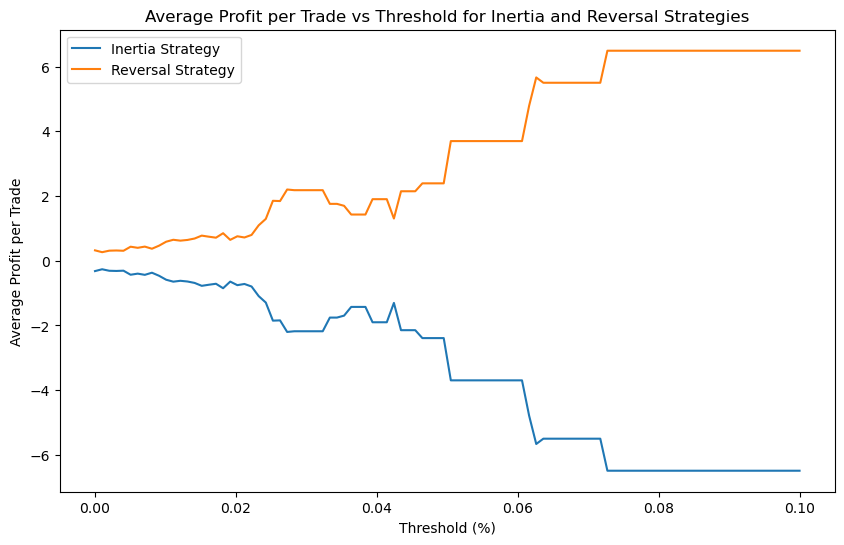

In [25]:
# 3. Perform threshold analysis
def threshold_analysis(df, strategy_column):
    thresholds = np.linspace(0, 0.1, 100)
    avg_profits = []
    
    for threshold in thresholds:
        filtered_df = df[abs(df['Open'] - df['Prev_Close']) / df['Prev_Close'] > threshold]
        avg_profit = filtered_df[strategy_column].mean()
        avg_profits.append(avg_profit)

    return thresholds, avg_profits

# Threshold analysis for both strategies
thresholds, inertia_avg_profits = threshold_analysis(df, 'Inertia_Profit')
_, reversal_avg_profits = threshold_analysis(df, 'Reversal_Profit')

# Plot the threshold analysis results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, inertia_avg_profits, label='Inertia Strategy')
plt.plot(thresholds, reversal_avg_profits, label='Reversal Strategy')
plt.xlabel('Threshold (%)')
plt.ylabel('Average Profit per Trade')
plt.title('Average Profit per Trade vs Threshold for Inertia and Reversal Strategies')
plt.legend()
plt.savefig('q3.png', dpi=100)
plt.show()

Analysis:

Inertia Strategy:

The Inertia strategy appears to have a decreasing profit as the threshold increases.

At low threshold values (0 to 0.02), the average profit is close to 0 or slightly negative.

As the threshold increases (beyond 0.02), the average profit per trade continues to decrease, eventually falling below -6 at around 0.06 to 0.08.

The strategy becomes unprofitable for larger threshold values.

Reversal Strategy:

The Reversal strategy shows an upward trend as the threshold increases.

For low threshold values (0 to 0.02), the average profit is positive and increases as the threshold grows.

At higher threshold values (between 0.05 and 0.08), the average profit per trade peaks at around 6 and stabilizes, meaning that fewer but more profitable trades are made.

The Reversal strategy consistently outperforms the Inertia strategy for larger threshold values.

Conclusion and Patterns:

Optimal Value for 𝑥

x: For the Reversal strategy, an optimal threshold appears to be around 0.06, where the profit per trade reaches its peak and stabilizes.

Key Insights:

Increasing the threshold for the Reversal strategy results in fewer trades but with larger average profits.

The Inertia strategy shows a significant decline in performance as the threshold increases, suggesting that it may not be suitable for larger overnight return values.

If you aim to maximize profit per trade, the Reversal strategy with a threshold around 0.06 seems to be the optimal choice.

# 4

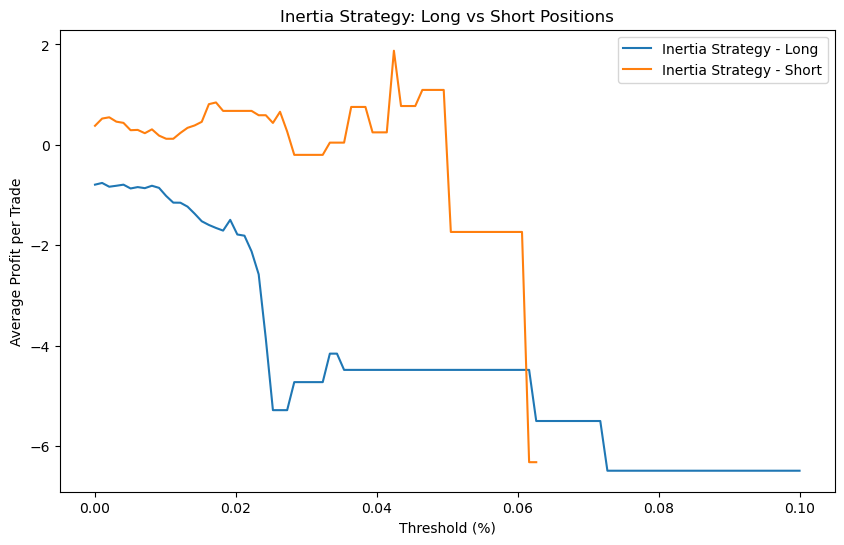

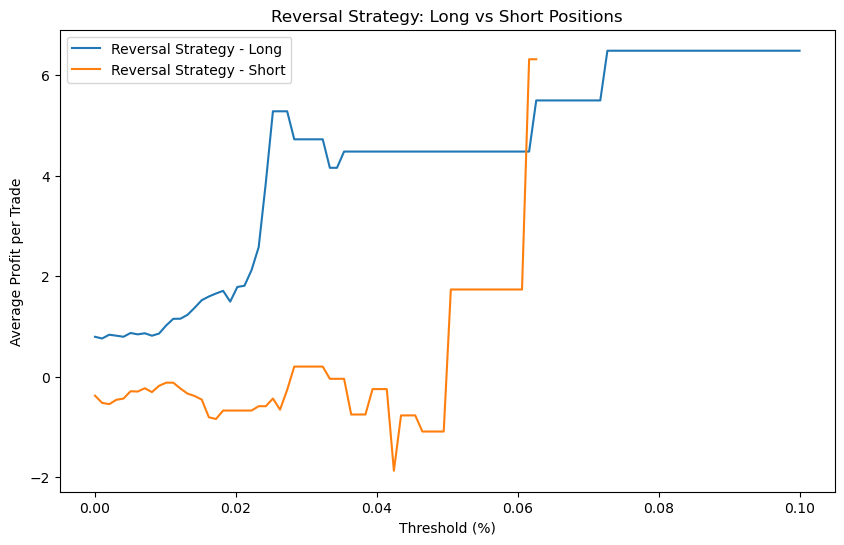

In [29]:
# 4. Perform separate analysis for long and short positions
def threshold_analysis_long_short(df, strategy_column):
    thresholds = np.linspace(0, 0.1, 100)
    long_profits, short_profits = [], []
    
    for threshold in thresholds:
        filtered_df = df[abs(df['Open'] - df['Prev_Close']) / df['Prev_Close'] > threshold]
        df_long = filtered_df[filtered_df['Open'] > filtered_df['Prev_Close']]
        df_short = filtered_df[filtered_df['Open'] < filtered_df['Prev_Close']]
        
        long_profit = df_long[strategy_column].mean()
        short_profit = df_short[strategy_column].mean()
        
        long_profits.append(long_profit)
        short_profits.append(short_profit)

    return thresholds, long_profits, short_profits

# Perform analysis for long and short positions separately
thresholds, inertia_long_profits, inertia_short_profits = threshold_analysis_long_short(df, 'Inertia_Profit')
_, reversal_long_profits, reversal_short_profits = threshold_analysis_long_short(df, 'Reversal_Profit')

# Plot long and short analysis for Inertia Strategy
plt.figure(figsize=(10, 6))
plt.plot(thresholds, inertia_long_profits, label='Inertia Strategy - Long')
plt.plot(thresholds, inertia_short_profits, label='Inertia Strategy - Short')
plt.xlabel('Threshold (%)')
plt.ylabel('Average Profit per Trade')
plt.title('Inertia Strategy: Long vs Short Positions')
plt.legend()
plt.savefig('q4_1.png', dpi=100)
plt.show()

# Plot long and short analysis for Reversal Strategy
plt.figure(figsize=(10, 6))
plt.plot(thresholds, reversal_long_profits, label='Reversal Strategy - Long')
plt.plot(thresholds, reversal_short_profits, label='Reversal Strategy - Short')
plt.xlabel('Threshold (%)')
plt.ylabel('Average Profit per Trade')
plt.title('Reversal Strategy: Long vs Short Positions')
plt.legend()
plt.savefig('q4_2.png', dpi=100)
plt.show()

1. Inertia Strategy (Long vs Short Positions):

Long Positions (Blue Line):

At low threshold values (close to 0), the long positions produce a small but stable negative profit (around -1).

As the threshold increases beyond 0.02, the long position performance deteriorates rapidly, falling below -6 at the 0.06 threshold and remaining there for higher thresholds.

Conclusion: The Inertia strategy for long positions does not perform well as the threshold increases, indicating that betting on the stock price to continue moving in the same direction becomes less effective as the overnight movement becomes larger.

Short Positions (Orange Line):

Short positions start with slightly positive profits (around 1) when the threshold is small.

As the threshold increases, the profits remain relatively stable, hovering between 1 and 2 until around 0.05, after which there is a sharp drop to around -6.

Conclusion: Short positions under the Inertia strategy perform better than long positions when the overnight price movement is moderate, but beyond a certain point (0.05 threshold), they become unprofitable as well.

Overall Observation:

The Inertia Strategy performs poorly for both long and short positions when the threshold is high, indicating that this strategy may not be well-suited to capture large overnight price movements, as it seems to rely on smaller, more stable trends.

2. Reversal Strategy (Long vs Short Positions):

Long Positions (Blue Line):

At low thresholds, the long positions yield stable but modest profits, starting just above 1.

As the threshold increases, the long positions perform significantly better, with profits increasing sharply to above 6 when the threshold reaches around 0.06 and stabilizing afterward.

Conclusion: The Reversal strategy works exceptionally well for long positions when the overnight return is significant. This suggests that betting on a reversal after a large price change is highly profitable for long positions.

Short Positions (Orange Line):

Short positions start with small, slightly positive profits for low thresholds.

As the threshold increases, there is some fluctuation, but overall short position profits remain low (close to 0) compared to long positions. There is no significant jump in performance, even at higher thresholds.

Conclusion: Short positions do not benefit as much from the Reversal strategy as long positions do, indicating that betting on a reversal of a price decline may be less effective than betting on the reversal of a price increase.

Overall Observation:

The Reversal Strategy works remarkably well for long positions, especially when there is a large overnight price movement. However, short positions do not experience the same level of profitability, suggesting that this strategy is more effective when capitalizing on the reversal of price increases rather than decreases.

# 5

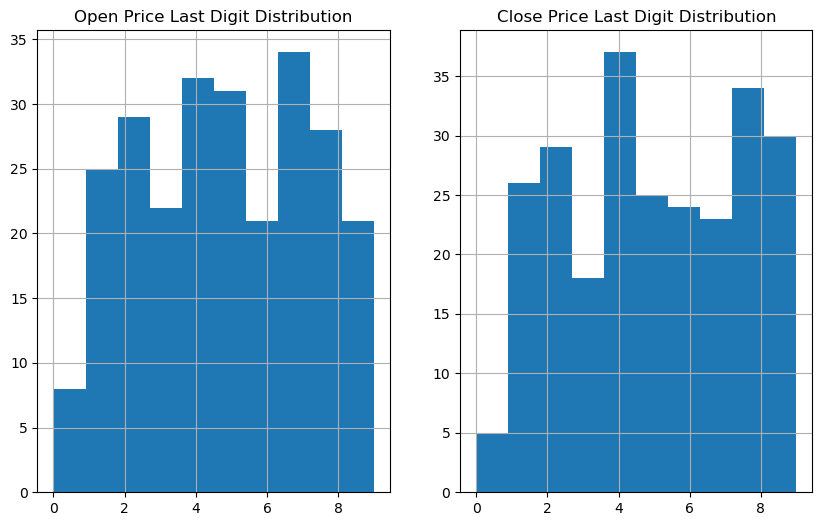

In [33]:
# 5. Histogram of last digits of Open and Close prices
df['Open_Last_Digit'] = df['Open'].apply(lambda x: int(str(x)[-1]))
df['Close_Last_Digit'] = df['Close'].apply(lambda x: int(str(x)[-1]))

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
df['Open_Last_Digit'].hist(bins=10)
plt.title('Open Price Last Digit Distribution')

plt.subplot(1, 2, 2)
df['Close_Last_Digit'].hist(bins=10)
plt.title('Close Price Last Digit Distribution')
plt.savefig('q5.png', dpi=100)
plt.show()

Open Price Last Digit Distribution:

The distribution of the last digit in the "Open" prices shows that:

Highest frequency: The digits 3 and 6 appear most frequently (both close to 35 occurrences).

Lowest frequency: The digit 0 has the lowest frequency, with fewer than 10 occurrences.

Overall, the distribution is somewhat uneven, with certain digits (like 3 and 6) appearing more frequently than others (like 0 and 1).

Close Price Last Digit Distribution:

The distribution of the last digit in the "Close" prices shows that:

Highest frequency: The digits 5 and 7 occur most frequently (both close to 35 occurrences).

Lowest frequency: The digit 0 appears the least frequently, with fewer than 10 occurrences.

Similar to the "Open" price distribution, the "Close" price distribution is also uneven, though the differences between digit frequencies are more pronounced.

Which distribution is more uniform?

The Open Price last digit distribution appears to be more uniform compared to the Close Price last digit distribution.

The "Open" price distribution has fewer large gaps between frequencies, whereas the "Close" price distribution shows more noticeable peaks (like for 5 and 7) and valleys (like for 1 and 0).

Overall, neither distribution is perfectly uniform, but the "Open" prices are slightly more consistent in their last-digit distribution compared to the "Close" prices.